# 12_1.Regression(예측)(단순)

- https://www.statsmodels.org/stable/gettingstarted.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [ ]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
mr_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/12_1.MR(pred).csv', encoding="cp949")
mr_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,150750,7388,5,6,1959,2002,1063,624,1327,0,1,1,1
1,2,131500,4435,6,5,2003,2003,848,420,848,0,3,2,2
2,3,160000,8800,6,6,1964,1964,1251,461,1251,0,1,1,1
3,4,187500,13031,6,5,1995,1996,691,409,691,807,1,1,1
4,5,153900,7892,6,5,1993,1993,1199,530,1199,0,3,2,2


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
mr_df['주거유형'].replace({1:'단독주택', 2:'튜플렉스', 3:'기타'}, inplace=True)
mr_df['판매유형'].replace({1:'보증증서', 2:'신규건물'}, inplace=True)
mr_df['판매조건'].replace({1:'정상판매', 2:'압류(공매도)'}, inplace=True)

mr_df['주거유형'] = mr_df['주거유형'].astype('category')
mr_df['판매유형'] = mr_df['판매유형'].astype('category')
mr_df['판매조건'] = mr_df['판매조건'].astype('category')
mr_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,150750,7388,5,6,1959,2002,1063,624,1327,0,단독주택,보증증서,정상판매
1,2,131500,4435,6,5,2003,2003,848,420,848,0,기타,신규건물,압류(공매도)
2,3,160000,8800,6,6,1964,1964,1251,461,1251,0,단독주택,보증증서,정상판매
3,4,187500,13031,6,5,1995,1996,691,409,691,807,단독주택,보증증서,정상판매
4,5,153900,7892,6,5,1993,1993,1199,530,1199,0,기타,신규건물,압류(공매도)


### 2.3 자료구조 살펴보기

In [ ]:
mr_df.shape

(121, 14)

In [ ]:
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      121 non-null    int64   
 1   가격      121 non-null    int64   
 2   연면적     121 non-null    int64   
 3   품질      121 non-null    int64   
 4   상태      121 non-null    int64   
 5   건축년도    121 non-null    int64   
 6   리모델링년도  121 non-null    int64   
 7   지하면적    121 non-null    int64   
 8   차고면적    121 non-null    int64   
 9   면적_1층   121 non-null    int64   
 10  면적_2층   121 non-null    int64   
 11  주거유형    121 non-null    category
 12  판매유형    121 non-null    category
 13  판매조건    121 non-null    category
dtypes: category(3), int64(11)
memory usage: 11.2 KB


In [ ]:
mr_df.columns

Index(['id', '가격', '연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', '주거유형', '판매유형', '판매조건'],
      dtype='object')

## 3.기술통계

In [ ]:
# 그룹별 기술통계
mr_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
id,121.0,61.000,35.074,1.0,31.0,61.0,91.0,121.0
가격,121.0,160050.653,24553.521,97000.0,144000.0,163000.0,175000.0,228000.0
연면적,121.0,8829.157,3040.173,1533.0,7200.0,9247.0,10800.0,16635.0
품질,121.0,5.901,0.723,4.0,5.0,6.0,6.0,8.0
상태,121.0,5.975,1.084,3.0,5.0,6.0,7.0,8.0
건축년도,121.0,1963.603,26.390,1890.0,1957.0,1968.0,1978.0,2009.0
리모델링년도,121.0,1982.570,18.394,1950.0,1968.0,1988.0,2000.0,2009.0
지하면적,121.0,967.207,315.738,0.0,731.0,912.0,1196.0,1844.0
차고면적,121.0,445.248,159.853,0.0,336.0,453.0,530.0,923.0
면적_1층,121.0,1119.347,317.726,483.0,848.0,1116.0,1350.0,2020.0


In [ ]:
# 범주형 변수
# lecture_df.columns
categorical_features = ['주거유형', '판매유형', '판매조건']

for col in categorical_features:
    print("----", col, "----")
    results = mr_df[col].value_counts()
    print(results, "\n")

---- 주거유형 ----
단독주택    90
튜플렉스    17
기타      14
Name: 주거유형, dtype: int64 

---- 판매유형 ----
보증증서    99
신규건물    22
Name: 판매유형, dtype: int64 

---- 판매조건 ----
정상판매       82
압류(공매도)    39
Name: 판매조건, dtype: int64 



## 4.Regression(예측)
- statsmodels
- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [ ]:
# 상수항 포함: sm.add_constant(X)
# X(대문자)와 y(소문자)로 분리

X = mr_df["연면적"]
y = mr_df['가격']

X = sm.add_constant(X) # 상수항 추가
model = sm.OLS(y, X)   # 모델 생성
result = model.fit()   # 모델 실행

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1051.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.36e-60
Time:                        10:54:22   Log-Likelihood:                -1241.7
No. Observations:                 120   AIC:                             2487.
Df Residuals:                     118   BIC:                             2493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.374e+04   2143.971     43.721      0.0

## 5.가정검정
- https://ethanweed.github.io/pythonbook/05.04-regression.html#regressionnormality
- 잔차의 등분산성: Breusch-Pagan
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

### 5.1 기본 검정
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1051.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.36e-60
Time:                        10:54:25   Log-Likelihood:                -1241.7
No. Observations:                 120   AIC:                             2487.
Df Residuals:                     118   BIC:                             2493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.374e+04   2143.971     43.721      0.0

### 5.2 잔차의 등분산 검정
- 잔차의 등분산성 테스트: Breush-Pagan 테스트:


In [ ]:
# 잔차의 등분산성 테스트: Breush-Pagan 테스트:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 2.6467172877876877),
 ('p-value', 0.10376397357146838),
 ('f-value', 2.6613029711732716),
 ('f p-value', 0.10548262056478383)]

In [ ]:
# 잔차 플롯

# 표준화 잔차 생성
influence = result.get_influence()
res_standard = influence.resid_studentized_internal

# 예측값 생성
pred = result.predict(X)

# 데이터 프레임으로 생성
regplot_df = pd.DataFrame({'pred': pred, 'res_standard': res_standard})
regplot_df

,pred,res_standard
0,148621.558510,0.281129
1,126683.886322,0.641241
2,159111.227704,0.117276
3,190543.090564,-0.404792
4,152365.746381,0.202534
...,...,...
115,158598.630555,-1.926341
116,105125.090287,-1.099381
117,147224.917002,-1.760452
118,147224.917002,-1.760452


<Axes: >

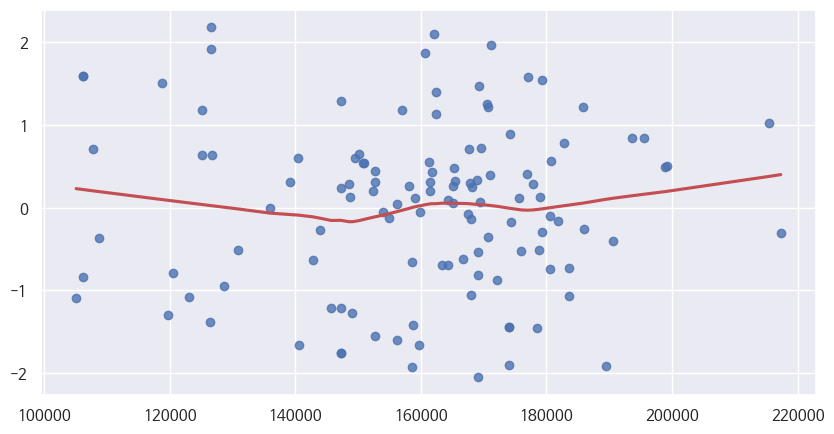

In [ ]:
## 잔차 plot
sns.regplot(x = pred,
            y = res_standard,
            lowess = True,
            line_kws=dict(color="r"),
            data = regplot_df)

### 5.3 잔차의 정규성 검정

In [ ]:
# shapiro test
pg.normality(result.resid)

,W,pval,normal
0,0.983205,0.141076,True


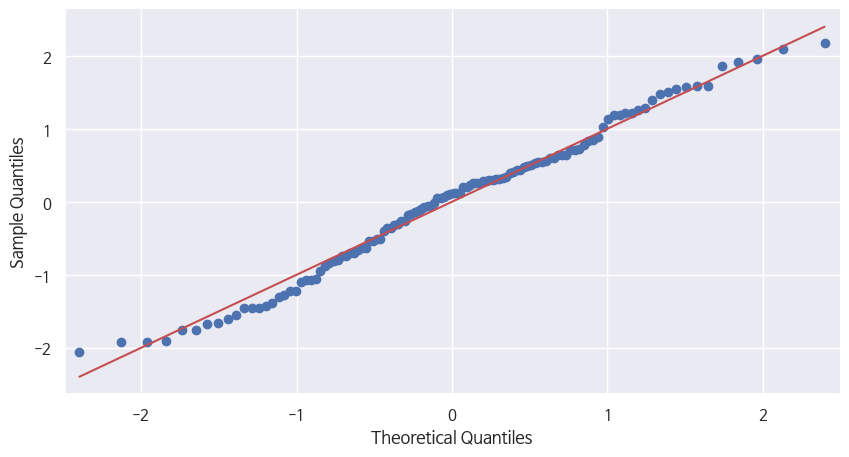

In [ ]:
## QQ plot
sm.qqplot(res_standard, line = 's')
sns.despine()

### 5.4 이상치 제거

In [ ]:
# 표준화 잔차를 이용한 이상치 확인
stud_res = result.outlier_test()
stud_res.sort_values(by = "student_resid", ascending = False).head(5)

,student_resid,unadj_p,bonf(p)
94,2.217294,0.028535,1.0
112,2.125550,0.035644,1.0
114,1.986570,0.049307,1.0
81,1.937303,0.055119,1.0
106,1.887921,0.061514,1.0


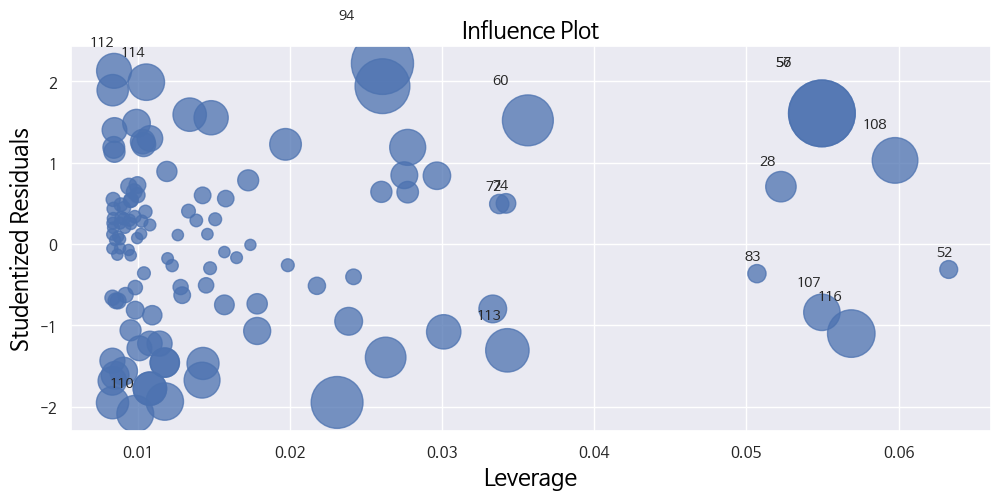

In [ ]:
## cooks_distance를 이용한 이상치 확인
## https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

fig = sm.graphics.influence_plot(result, criterion="cooks")

plt.rc("figure", figsize=(10, 5))
plt.rc("font", size = 7)
fig.tight_layout(pad = 1.0)

In [ ]:
# cooks_distance를 이용한 이상치 확인
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(result).cooks_distance
pd.DataFrame(test_class).T.sort_values(by = 0, ascending = False).head(10)

,0,1
57,0.073758,0.928939
56,0.073758,0.928939
94,0.063724,0.938296
81,0.049115,0.952091
95,0.043738,0.957220
60,0.042096,0.958792
116,0.036454,0.964214
108,0.033445,0.967117
113,0.030103,0.970353
111,0.026015,0.974326


In [ ]:
# 이상치 제거
mr_df = mr_df.drop(120)

### 5.5 선형성

<Axes: xlabel='pred', ylabel='가격'>

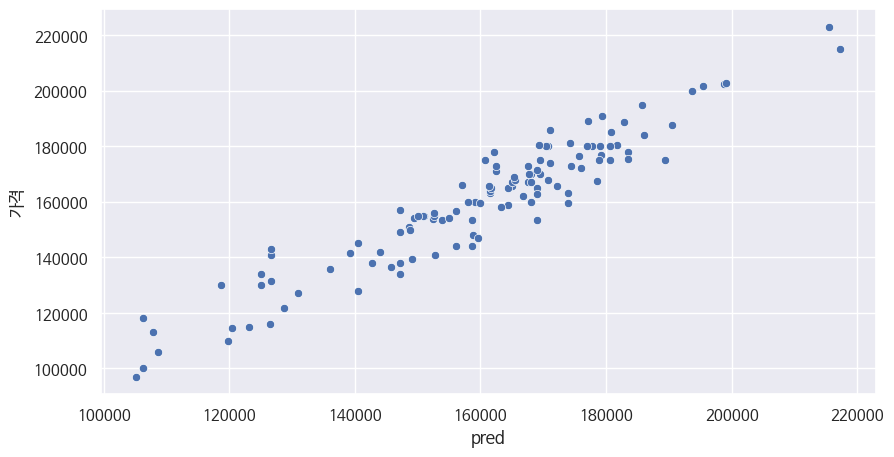

In [ ]:
# 회귀도표: 예측치 vs 실제값
sns.scatterplot(x = regplot_df["pred"], y = mr_df["가격"])

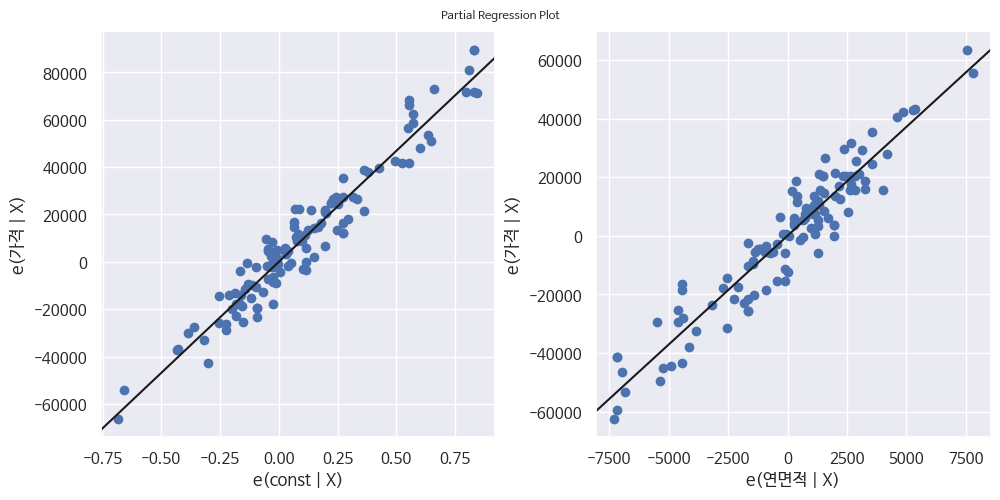

In [ ]:
# 부분 회귀 도표
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad = 1.0)

# 부록1 pingouin
- https://pingouin-stats.org/build/html/generated/pingouin.linear_regression.html#pingouin.linear_regression
- 분석이 간단하지만 가정검정 지원이 안됨

In [ ]:
X = mr_df["연면적"]
y = mr_df['가격']

lm = pg.linear_regression(X, y)
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,93736.519,2143.971,43.721,0.0,0.899,0.898,89490.872,97982.166
1,연면적,7.429,0.229,32.415,0.0,0.899,0.898,6.975,7.883


In [ ]:
pg.normality(lm.residuals_)

,W,pval,normal
0,0.983205,0.141076,True
